# Preparing Environment

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, precision_recall_fscore_support)

# Load the data

In [5]:
path =  '../.features.csv'
df = pd.read_csv(path)
df.head()

,rms_1,zc_1,var_1,mav_1,sscl_1,wl_1,hrm_1,ren_1,rms_2,zc_2,...,ren_15,rms_16,zc_16,var_16,mav_16,sscl_16,wl_16,hrm_16,ren_16,label
0,6.786752,110,45.231900,4.280,142,1211.0,856.00,0,2.249444,122,...,0,1.882817,110,2.452975,1.465,150,346.0,241.159998,0,1
1,6.904346,105,46.930400,4.420,143,1229.0,880.56,0,2.305428,120,...,0,1.881489,112,2.599100,1.440,149,351.0,241.439999,0,1
2,7.430007,102,54.762775,4.955,145,1373.0,988.34,0,4.481629,121,...,0,1.945508,107,2.872975,1.495,150,363.0,251.250001,0,1
3,8.133880,100,65.763100,5.580,144,1559.0,1110.96,0,8.099383,123,...,0,1.960867,112,2.970775,1.495,143,369.0,255.990000,0,1
4,7.400676,103,54.237100,5.470,152,1580.0,1079.40,0,9.904292,130,...,0,2.065188,108,3.254975,1.575,145,391.0,259.270000,0,1


# Split the data into training and testing sets, and preprocess the data with Dummy using GridSearchCV

In [6]:
X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
dummy = DummyClassifier(random_state=42)

param_grid = [
    {"strategy": ["stratified", "most_frequent", "prior", "uniform"]}
]

grid_search = GridSearchCV(dummy, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DummyClassifier(random_state=42),
             param_grid=[{'strategy': ['stratified', 'most_frequent', 'prior',
                                       'uniform']}],
             scoring='accuracy')

# Metrics

## Training Metrics

In [9]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'strategy': 'most_frequent'}
Best cross-validation accuracy: 0.14488756329049055


## Test Metrics

In [10]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Test set accuracy: 0.142880712753671


## Classification report

In [12]:
report = classification_report(y_test, y_pred, digits=3)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           1      0.000     0.000     0.000       853
          13      0.000     0.000     0.000       885
          14      0.000     0.000     0.000       853
          17      0.000     0.000     0.000       882
          18      0.143     1.000     0.250       866
          19      0.000     0.000     0.000       884
          34      0.000     0.000     0.000       838

    accuracy                          0.143      6061
   macro avg      0.020     0.143     0.036      6061
weighted avg      0.020     0.143     0.036      6061



/home/rodrigo/Documents/Mestrado/sEMG/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rodrigo/Documents/Mestrado/sEMG/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rodrigo/Documents/Mestrado/sEMG/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

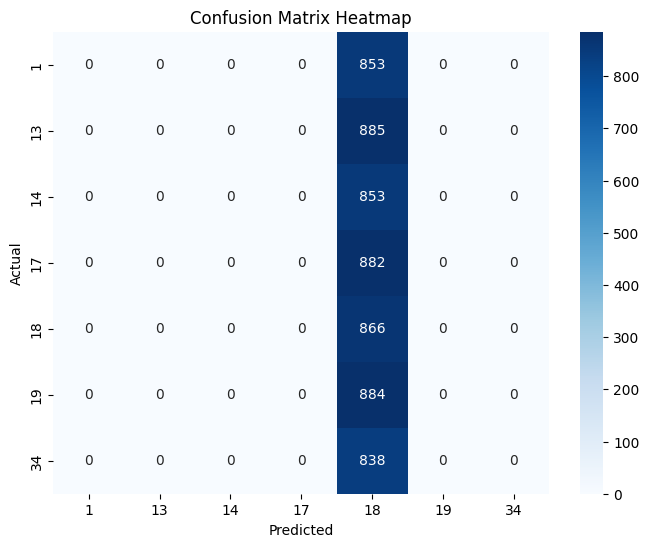

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - EEMG")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [14]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)
for idx, (p, r, f, s) in enumerate(zip(precision, recall, f1, support)):
    print(f"\nClass {idx}:")
    print(f"  Precision: {p:.3f}")
    print(f"  Recall:    {r:.3f}")
    print(f"  F1-Score:  {f:.3f}")
    print(f"  Support:   {s}")


Class 0:
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000
  Support:   853

Class 1:
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000
  Support:   885

Class 2:
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000
  Support:   853

Class 3:
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000
  Support:   882

Class 4:
  Precision: 0.143
  Recall:    1.000
  F1-Score:  0.250
  Support:   866

Class 5:
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000
  Support:   884

Class 6:
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000
  Support:   838


/home/rodrigo/Documents/Mestrado/sEMG/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
